Если совсем просто, то pif -это пакетный файл с настройками(аналоги: bat, lnk) и значком для DOS-программ в WINDOWS.
Если попробовать нарисовать программку, куда просто передавать имя bas-файла, а там ее компилировать с помощью bc + link в exe-шник без участия QB.
Например вот на основе такого bat-файла:

    set file=filename
    set patch=c:\123
    bc.exe %patch%\Bas\%file% %patch%\obj\%file% %patch%\lst\%file% %file% /O/Ot
    link.exe /F/E/inf/m:full obj\%file%,exe\%file%,,,,
    %patch%\exe\%file%

Ну это с учетом, что Вы работаете в мультизадачной системе. QB при этом занимается своей задачей. 

# Как построить диагностирующую ЭС
Нам нужна система, представляющая группу симптомов, которая на их основании  выведет название болезни. Именно это мы сейчас и попробуем сделать. Идеальной будет такая ситуация, при которой мы сможем в той или иной области предоставить компу в приемлемом для него виде множество определений, которые он сможет использовать примерно так же, как человек-эксперт.

С учетом байесовской системы логического вывода примем, что большая часть информации не является абсолютно точной, а носит вероятностный характер. Это неплохо звучит, когда, рассказывая другим о вашем подходе, вы подчеркиваете, что используете байесовскую систему логического вывода. Мы же сосредоточим основное внимание на том, в каком формате требуется представить вводимую в программу информацию об области, в которой система должна стать экспертом, потому что сбор этой информации наверняка будет самой трудной частью работы.

Экспертная система пользуется методом, основанным на применении формулы Байеса с целью оценки априорной и апостериорной вероятностей какого-либо события. Под «событием» здесь понимается что угодно, например справедливость гипотезы о золоте и кучах. В общих чертах каждая гипотеза имеет априорную вероятность того, что она верна, равную, скажем, $Р(Н)$. Так, априорная вероятность того, что «в тех кучах есть золото», может быть равна 0.1, поэтому запишем $Р(Н) =0.1$.
Ну, а теперь Вы — золотоискатель, сидите у экрана и даете системе дополнительные свидетельства о наличии золота. При получении этих дополнительных свидетельств, например «только что найден кусок золота размером с кулак», вероятность $Р(Н)$ изменяется и становится равной $Р(Н/Е)$—вероятности осуществления гипотезы при наличии нового подтверждающего свидетельства. Таким образом, система корректирует старое значение, используя оператор присваивания $Р(Н) := Р(Н/Е)$, а затем проверяет новые свидетельства. Вопрос состоит в том, как вычислить $Р(Н / Е)$.
Что ж, достопочтенный Байес дает ответ. Вот он:
$$P(H/E) = \frac{P(E/H)P(H)}{P(E)} = \frac{P(E/H)}{P(E)} \cdot P(H),$$
где $Р(Е) = Р(Е/Н)\cdotР(Н) + Р(Е/\overline{Н})\cdotР(\overline{Н}) $ и 
$Р(\overline{Н}) = 1-P(H) $

или другой вариант: $$Р(Н/E)=\frac{LS(H)\cdot P(H)}{(P(\overline{Н})+LS(H)\cdot Р(Н))} = \frac{LS(H)\cdot P(H)}{1-P(H)+LS(H)\cdot Р(Н)}$$ — это, по крайней мере, выглядит проще. Здесь
$$LS(H) = \frac{Р(Е/Н)}{Р(Е/ \overline{Н})}$$.

Пусть имеется некоторая гипотеза Н и некоторая априорная вероятность  того, что гипотеза Н истинна. Эта вероятность $Р(Н)$ либо задается в самом начале как исходное данное, либо является результатом предыдущих преобразований. Например, $P(H) = 0.01$ означает, что существует априорная (т.е. заранее ихвестная) вероятность того, что любой наугад взятый человек болен, например, гриппом. Далее предполагается, что появляется некоторое свидетельство (признак, улика, свидетельство) $Е$ (сокращение от слова Evidence), относящееся к данной гипотезе, и мы хотим на основе этой информации уточнить априорную вероятность истинности гипотезы Н. Условная вероятность $P(H/E) = 0.9$ означает, что 9 человек из 10 ответит на впорос *Есть ли у Вас симптом $E$?* утвердительно (Да) при условии, что он болен гриппом, т.е. 9 человек больных гриппом испытывают этот симптом, а один - нет.

Согласно формуле Байеса имеем: 
$$P(H/E) = \frac{P(E/H)P(H)}{P(E)} = \frac{P(E/H)}{P(E)} \cdot P(H),$$
где $Р(Е) = Р(Е/Н)Р(Н) + Р(Е/\overline{Н})Р(\overline{Н}) $ и 
$Р(\overline{Н}) = 1-P(H) $

$Р(Е) = Р(Е/Н)Р(Н) + Р(Е/\overline{Н})(1-P(H)) $ 
или
$P(E) = (Р(Е/Н) - Р(Е/\overline{Н}))P(H) + Р(Е/\overline{Н})  $

$$P(B/A) = \frac{P(A\cdot B)}{P(A)}$$

### Цена свидетельства E
Для каждой гипотезы $H_i$, которая проявляется в симптоме $E$ считается $|P(H_i/E) - Р(Н_i/\overline{Е})|$ и все эти значения суммируются:
$$C(E) = \sum_{i=1}^{n} |P(H_i/E) - Р(Н_i/\overline{Е})|$$

$$C(E) = \sum_{i=1}^{n} \big|\frac{P(E/H_i)P(H_i)}{P(E)} - \frac{(1-P(E/H_i))P(H_i)}{1-P(E)}\big|$$
$$Р(Е) = Р(Е/Н)Р(Н) + Р(Е/\overline{Н})Р(\overline{Н}) $$
$$Р(\overline{Н}) = 1-P(H) $$

### Структура базы знаний 
База знаний рассматриваемой диагностирующей ЭС содержит записи, 
касающиеся знаний о конкретных диагнозах (гипотезах) и знаний о соответствующих симптомах (свидетельствах). Формат записи для описания конкретной гипотезы Н (формат 1) может иметь следующий вид: 

$$H_{НАЗВ.ГИП}; Р; S; (j_1;р_{1}^{+};р_{1}^{-}); ...; (j_s;р_{s}^{+};р_{s}^{-})$$

Здесь 
- НАЗВ. ГИП. — название гипотезы Н; 
- $Р = Р(Н)$ — априорная (исходная) вероятность данной гипотезы; 
- $S$ — число свидетельств $E_{i}$ относящихся к данной гипотезе; 
- $j_k$ — номер свидетельства; 
- $р_{i}^{+} = Р(Е_i/H)$ — вероятность (благоприятствования) выполнения свидетельства $Е_i$ для (в контексте) данной гипотезы, по-другому, вероятность получить ответ Да на впорос $E_i$, если верен исход $H$; 
- $р_{i}^{-} = Р(Е_i/\overline H)$ — вероятность выполнения свидетельства $Е_i$ при неверности данной гипотезы $Н$ (в контексте конкурирующих гипотез). По-другому, вероятность получить ответ Да на впорос $E_i$, если исход $H$ не верен; 


Допустим, программа задает вопрос i (симптом i). Если мы имеем Р(Е_i/ Н) = $р_{i}^{+}$ =0.9 и Р(Е_i/ неН) = $р_{i}^{-}$ = 0.01, то это означает, что если у пациента грипп, то он в девяти случаях из десяти ответит «Да» на этот вопрос, а если у него нет гриппа, он ответит «Да» лишь в одном случае из ста. Очевидно, ответ «Да» подтверждает гипотезы о том, что у него грипп. Ответ «Нет» позволяет предположить, что человек гриппом не болеет.

Поэтому, если мы хотим ввести в систему новый симптом **X**, то для этого мы должны задать такие вопросы медикам:

**Какая доля пациентов с данным заболеванием испытывают симптом X?**

Ответы могут быть такими: 0.1, т.е. в девяти случаях из десяти пациент будет испытывать (в той или иной степени) данный симптом.
Или, например, если у человека данная болезнь, а некоторый симптом E должен присутствовать, то следует ответить 1, т.е. Р(Е/H)=1. 

**Какая доля пациентов с заболеваниями отличными от данного  испытывают симптом X?**

Ответы могут быть такими: 0.01, т.е. один из ста пациентов будет испытывать (в той или иной степени) данный симптом, но при этом болеть какой-то другой болезнью. 

Еще вариант ответа: 0.001, т.е. соответствующий симптом может иметь место и при отсутствии данного заболевания (Р(Е/ не H) = 0.001), но это встречается крайне редко. т.е. один человек из тысячи, не болеющий данной болезнью $H$ может сказать, что испытывает симптом $E$.

Наткунулся на классификацию частоты развития побочных эффектов Всемирной организации здравоохранения (ВОЗ):
Классификация ВОЗ нежелательных побочных реакций по частоте развития:

    очень частые – 1/10 назначений (≥10%);
    частые – 1/100 назначений (≥1%, но <10%);
    нечастые – 1/1000 назначений (≥0,1%, но <1%);
    редкие – 1/10000 назначений (≥0,01%, но <0,1%);
    очень редкие – менее 1/10000 назначений (<0,01%).

#### Пример БЗ гипотез
| # | Текст  | P| S| (1; p+; p-)     | (2; p+; p-)|   (3;p+; p-)       |(4; p+; p-)|(5; p+; p-)| (6; p+; p-) |
|---|--------|--|--|-----------------|------------|--------------------|-----------|-----------|-------------|
| 1. | Сел аккумулятор | 0,1| 5| (1; 0; 0.99)     | (2; 0,7; 0,05)|                    |(4; 0,2; 0,5)|(5; 0; 0,99)| (6; 1; 0,01) |
| 2. | Нет бензина | 0,05| 2|                     | (2; 1; 0,01)|                     |              |             |(6; 0,9; 0,02) |
| 3. | Отсырел распределитель зажигания | 0,01| 3|   |    |(3; 0,9; 0,1)|(4; 0,25; 0,5)|              |(6; 0,9; 0,02) |
| 4. | Загрязнены свечи | 0,01| 2|    |      |                          |(4; 0,01; 0,5)|               |(6; 0,9; 0,02) |

In [9]:
# База гипотез Hi
H = {0:(0.1, 'Сел аккумулятор',                 ((0,0.99),(0.7,0.05),(0.0,0.0),(0.2,0.5), (0,0.99),(1,0.01))),
     1:(0.05,'Нет бензина',                     ((0,0.0), (1,0.01),  (0.0,0.0),(0.0,0.0), (0,0.0), (0.9,0.02))),
     2:(0.01,'Отсырел распределитель зажигания',((0,0),   (0,0.01),  (0.9,0.1),(0.25,0.5),(0,0.0), (0.9,0.02) )),
     3:(0.01,'Загрязнены свечи',                ((0,0),   (0,0),     (0,0),    (0.01,0.5),(0,0),   (0.9,0.02))),    
    }

Знания о свидетельствах (симптомах) $Е_i$ могут быть представлены в следующем формате (формат 2):

**№_свидетельства; Название_свидетельства; Задаваемый__вопрос.**


#### Пример БЗ свидетельств

Многое в работе алгоритма зависит от списка вопросов, которым вы ее снабдили. Теоретически расчеты производятся в предположении, что каждый вопрос не зависит от остальных. В противном случае степень достоверности ответов ухудшается.
Например, если вы спросите: «Есть ли у вас температура?», а затем — «Вас лихорадит?», то очевидно, что заданные вопросы взаимосвязаны. Просто нет смысла задавать оба этих вопроса, но если вы все же зададите их, то это изменит значения вероятностей, связанных с соответствующими исходами, потому что фактически одно и то же свидетельство будет учтено дважды.

In [10]:
# База свидетельств (симптомов) Ei
E = {0:('Фары горят','Горят ли фары?'),
     1:('Указатель бензина на нуле','Есть ли бензин?'),
     2:('Автомобиль отсырел','Не находился ли автомобиль долго под дождем?'),
     3:('Автомобиль недавно прошел ТО','Проходил ли автомобиль недавно ТО?'),
     4:('Стартер крутится','Крутится ли стартер?'),
     5:('Автомобиль не заводится','Автомобиль не заводится?'),
    }

### 15.4.1. Алгоритм логического вывода 

В базе знаний имеем конечное множество гипотез $H_1,..., H_n$ и конечное множество свидетельств (вопросов) $Е_1, E_2,..., E_s$.


|        |     $H_1$                    |    $H_2$                      |     $H_3$                   | ...  |
|--------| -----------------------------|-------------------------------|-----------------------------|------|
| $Е_1$  | $(11;р_{11}^{+};р_{11}^{-})$ | $(12;р_{12}^{+};р_{12}^{-})$  |$(13;р_{13}^{+};р_{13}^{-})$ | ...  |
| $Е_2$  | $(21;р_{21}^{+};р_{21}^{-})$ | $(22;р_{22}^{+};р_{22}^{-})$  |$(23;р_{23}^{+};р_{23}^{-})$ | ...  |
| $Е_3$  | $(31;р_{31}^{+};р_{31}^{-})$ | $(32;р_{32}^{+};р_{32}^{-})$  |$(33;р_{33}^{+};р_{33}^{-})$ | ...  |
| $...$  | $...$                        | $...$                         | $...$                       | ...  |
| $Е_s$  | $(s1;р_{s1}^{+};р_{s1}^{-})$ | $(s2;р_{s2}^{+};р_{s2}^{-})$  |$(s3;р_{s3}^{+};р_{s3}^{-})$ | ...  |

Если свидетельство $Е_i$ не является необходимым условием $H_j$, т.е. $Е_i$ не благоприятствует гипотезе $H_j$, то   полагаем $(ij;р_{ij}^{+};р_{ij}^{-}) = (ij;0;0)$

1. **Сформировать массив исходных $P(H_i)$ априорных вероятностей для всех гипотез.** Для этого просмотреть базу знаний (формат 1) и извлечь Р для каждой из гипотез (это второй элемент записи в формате 1). 

In [7]:
# массив исходных 𝑃(𝐻𝑖) априорных вероятностей для всех гипотез
P_H = [elem[0] for elem in H.values()]
P_H

[0.1, 0.05, 0.01, 0.01]

2. **Сформировать массив цен свидетельств $C(E_i)$:**


|        |     $H_1$                    |    $H_2$                      |     $H_3$                   | $...$  |$C(E_i)$ |
|--------| -----------------------------|-------------------------------|-----------------------------|--------|---------|
| $Е_1$  | $(11;р_{11}^{+};р_{11}^{-})$ | $(12;р_{12}^{+};р_{12}^{-})$  |$(13;р_{13}^{+};р_{13}^{-})$ | $...$  |$C(E_1)$ |
| $Е_2$  | $(21;р_{21}^{+};р_{21}^{-})$ | $(22;р_{22}^{+};р_{22}^{-})$  |$(23;р_{23}^{+};р_{23}^{-})$ | $...$  |$C(E_2)$ |
| $Е_3$  | $(31;р_{31}^{+};р_{31}^{-})$ | $(32;р_{32}^{+};р_{32}^{-})$  |$(33;р_{33}^{+};р_{33}^{-})$ | $...$  |$C(E_3)$ |
| $...$  | $...$                        | $...$                         | $...$                       | $...$  |$...$    |
| $Е_s$  | $(s1;р_{s1}^{+};р_{s1}^{-})$ | $(s2;р_{s2}^{+};р_{s2}^{-})$  |$(s3;р_{s3}^{+};р_{s3}^{-})$ | $...$  |$C(E_s)$ |

### Цена свидетельства E(стр.304 Часть III. Экспертные системы принятия решений)
Для каждой гипотезы $H_j$, которая проявляется в симптоме $E_i$ считается $|P(H_j/E_i) - Р(Н_j/\overline{Е_i})|$ и все эти значения суммируются:

$$C(E_i) = \sum_{j=1}^{n} |\frac{P(E_i/H_j)P(H_j)}{P(E_i)} - \frac{(1-P(E_i/H_j))P(H_j)}{1-P(E_i)}|$$
$$Р(E_i) = Р(E_i/Н_j)Р(Н_j) + Р(E_i/\overline{Н_j})Р(\overline{Н_j}) $$
$$Р(\overline{Н_j}) = 1-P(H_j) $$
Причем, если свидетельство $Е_i$ не является необходимым условием $H_j$, т.е. $(ij;р_{ij}^{+};р_{ij}^{-}) = (ij;0;0)$, то 
соответствующий член $$|\frac{P(E_i/H_j)P(H_j)}{P(E_i)} - \frac{(1-P(E_i/H_j))P(H_j)}{1-P(E_i)}| == 0,$$ 

Здесь 
- НАЗВ. ГИП. — название гипотезы $Н$; 
- $Р = Р(Н_i)$ — $H[i][0]$ — априорная (исходная) вероятность данной гипотезы; 
- $S$ — $H[i][1]$ — число свидетельств $E_{i}$ относящихся к данной гипотезе; 
- $j_k$ — номер свидетельства; 
- $р_{i}^{+} = Р(Е_i/H_j)$ — $H[j][2][i_{evid}][0]$ — вероятность выполнения свидетельства $Е_i$ для данной гипотезы; 
- $р_{i}^{-} = Р(Е_i/\overline H)$ — $H[j][2][i_{evid}][1]$ — вероятность выполнения свидетельства $Е_i$ при неверности данной гипотезы $Н$. 

In [8]:
H[1][2]

((0, 0.0), (1, 0.01), (0.0, 0.0), (0.0, 0.0), (0, 0.0), (0.9, 0.02))

In [10]:
# количество гипотез
len(H)

4

In [6]:
len(H[1][2]) # количество свидетельств

6

In [16]:
# функция для расчета цены свидетельства по всем гипотезам
def evidens_cost(H,n_evid,new_P_H = []):
    '''
    функция для расчета цены свидетельства
    evidens_cost(H,n_evid,new_P_H = []), где
    H - словарь гипотез,
    n_evid - номер свидетельства,
    new_P_H - скорректированный список априорных вероятностей
    (на первом шаге new_P_H еще не посчитан) 
    '''
    
    res = 0
    for hips in range(len(H)): #len(H.values()) - количество гипотез
        #print('n_evid=',n_evid,'hips=',hips, 'res',res)
        try: 
            if not new_P_H:
                res += abs(H[hips][2][n_evid][0]*H[hips][0] /\
                           (    H[hips][2][n_evid][0] *H[hips][0] + H[hips][2][n_evid][1]*(1-H[hips][0]) ) -\
                          (1 -  H[hips][2][n_evid][0])*H[hips][0]/\
                           (1 - H[hips][2][n_evid][0] *H[hips][0] - H[hips][2][n_evid][1]*(1-H[hips][0]) ) ) # C(E_i)
                # print('n_evid=',n_evid,'hips=',hips, 'res',res)
            else:
                res += abs(H[hips][2][n_evid][0]*new_P_H[hips] /(    H[hips][2][n_evid][0]*new_P_H[hips] + H[hips][2][n_evid][1]*(1-new_P_H[hips])) -\
                      (1 - H[hips][2][n_evid][0])*new_P_H[hips]/(1 - H[hips][2][n_evid][0]*new_P_H[hips] - H[hips][2][n_evid][1]*(1-new_P_H[hips])  )) # новые C(E_i)
                # print('n_evid=',n_evid,'hips=',hips, 'res',res)
        except:             
            continue
            
    return res
    

In [17]:
# посчитали цену каждого свидетельства
evidences_cost = [evidens_cost(H,n_evid) for n_evid in range(len(H[1][2])) ] #len(H[1][2]) # количество свидетельств
evidences_cost

[0.9174311926605506,
 1.4252334714429589,
 0.08221225710014947,
 0.13769631598239457,
 0.9174311926605506,
 2.2381550042461824]

In [18]:
# определеили максимальную цену свидетелств
max_evidences_cost = max(evidences_cost)
max_evidences_cost

2.2381550042461824

3. **Определить свидетельство(\ва!!!) $Е_{max} = max_j C(E_j)$ с максимальной ценой**

In [9]:
# нашли номер свидетельств, которое имеет наибольшую цену
num_evidence_max_cost = evidences_cost.index(max_evidences_cost)
num_evidence_max_cost

5

In [11]:
# сформировали список оставшихся свидетельств
list_unused_evidences = list(E.keys())
list_unused_evidences.pop(num_evidence_max_cost)
list_unused_evidences

[0, 1, 2, 3, 4]

In [12]:
# в списке свидетельств может оказаться несколько свидетельств с максимальной ценой
evidences_max_cost_list = [elem for elem in range(len(evidences_cost)) if evidences_cost[elem] == max_evidences_cost]
evidences_max_cost_list

[5]

4. **Задать пользователю вопрос**, хранящийся в базе знаний (формат 2) для найденного на шаге 3 свидетельства $Е_{max}$. Ответ пользователя $R_{max}$ должен быть дан по шкале от -5 до +5. 

1. Во-первых, случай $R_{max} = 5$ (ДА) должен соответствовать вероятности $Р(Н/Е)$, вычисленной по формуле Байеса. 
2. Во-вторых, вариант $R_{max} =-5$ (НЕТ) должен соответствовать величине $Р(Н/\overline{Е})$, также вычисленной по формуле Байеса. 
3. В-третьих, вариант $R_{max} =0$ (НЕ ЗНАЮ) должен соответствовать прежней величине $Р(Н)$. 

{-5: $Р(Н/\overline{Е})$,  -4: 9.5,  -3: 8.0,  -2: 6.5,  -1: 5.0,  0: $Р(Н)$,  1: 3.2,  2: 2.9,  3: 2.6,  4: 2.3,  5: $Р(Н/Е)$}

In [15]:
# задать вопрос с максимальной ценой
question = [E[elem][1] for elem in evidences_max_cost_list]
question

['Автомобиль не заводится?']

In [16]:
# имитация ответа пациента
import random
answer = random.choice([-5,-4,-3,-2,-1,0,1,2,3,4,5])
answer

1

In [ ]:
# для каждой гипотезы по теореме байеса корректируемь априорные вероятности, 
# т.е. считаем апостериорные вероятности в зависимости от ответа пациента.
# Например, если ответ был R = -5, то 
Р(Н𝑖/𝑅) = [{-5: Р(Н1/~Е𝑚𝑎𝑥), -4: interp, -3: interp, -2: interp, -1: interp, 0: Р(Н𝑖), 1: interp, 2: interp, 3: interp, 4: interp, 5: Р(Н1/Е𝑚𝑎𝑥)},
           {-5: Р(Н2/~Е𝑚𝑎𝑥), -4: interp, -3: interp, -2: interp, -1: interp, 0: Р(Н𝑖), 1: interp, 2: interp, 3: interp, 4: interp, 5: Р(Н2/Е𝑚𝑎𝑥)},
           ...,
           {-5: Р(Нn/~Е𝑚𝑎𝑥), -4: interp, -3: interp, -2: interp, -1: interp, 0: Р(Н𝑖), 1: interp, 2: interp, 3: interp, 4: interp, 5: Р(Нn/Е𝑚𝑎𝑥)}  
          ]

5. **Пересчитать массив $Р(Н_i)$ в соответствии с полученным на шаге 4 ответом $R_{max}$ пользователя (см. разд. 15.1):**

|        |     $H_1$    |    $H_2$     |     $H_3$   | $...$  | $...$   |
|--------| -------------|--------------|-------------|--------|---------|
| $Е_{max}$  | $P(H_1/R_{max})$ | $P(H_2/R_{max})$ |$P(H_3/R_{max})$ | $...$  |  |


$$Р_{new}(H_i):=Р(Н_i/R_{max})$$
(стр.302 Часть III. Экспертные системы принятия решений )

- Во-первых, случай $R_{max} = 5$ (ДА) должен соответствовать вероятности $Р(Н/Е_{max})$, вычисленной по формуле Байеса. 
- Во-вторых, вариант $R_{max} =-5$ (НЕТ) должен соответствовать величине $Р(Н/\overline{Е_{max}})$. 
- В-третьих, вариант $R_{max} =0$ (НЕ ЗНАЮ) должен соответствовать величине $Р(Н)$. 

$Р(Н_i/R)$ = {-5: $Р(Н_i/\overline{Е_{max}})$,  -4: interp,  -3: interp,  -2: interp,  -1: interp,  0: $Р(Н_i)$,  1: interp,  2: interp,  3: interp,  4: interp,  5: $Р(Н_i/Е_{max})$}, где

согласно формуле Байеса имеем: 
$$P(Н_i/Е_{max}) = \frac{P(Е_{max}/H)P(Н_i)}{P(Е_{max})} = \frac{P(Е_{max}/Н_i)}{P(Е_{max})} \cdot P(Н_i), (**)$$
где $Р(Е_{max}) = Р(Е_{max}/Н_i)Р(Н_i) + Р(Е_{max}/\overline{Н_i})Р(\overline{Н_i}) $ и 
$Р(\overline{Н_i}) = 1-P(Н_i) $

$$P(Н_i/\overline{Е_{max}}) = \frac{P(\overline{Е_{max}}/H)P(Н_i)}{P(\overline{Е_{max}})} = \frac{(1 - P({Е_{max}}/Н_i)) P(H_i)}{1 -P({Е_{max}})} ,(***)$$
где $Р(Е_{max}) = Р(Е_{max}/Н_i)Р(Н_i) + Р(Е_{max}/\overline{Н_i})Р(\overline{Н_i}) $ и 
$Р(\overline{Е_{max}}) = 1-P(Е_{max}) $

In [20]:
from scipy.interpolate import interp1d

# функция возвращает список уточненых априорных вероятностей с учетом ответа на вопрос
def p_Н𝑖_𝑅(H,num_evidence_max_cost, answer_evidence_max_cost, P_H_new = []):# H - словарь гипотез, R - целочисленный ответ из промежутка [-5,5] на вопрос evidence_max_cost
    '''
    функция для расчета апостериорных вероятностей гипотез
    возвращает список уточненых априорных вероятностей с учетом ответа на вопрос
    Входные параметры:
    H - словарь гипотез,
    num_evidence_max_cost - номер свидетельства с максимальной ценой, 
    P_H_new - список апостериорных вероятностей (на первом шаге P_H_new = [])
    '''
    res = []
    dct = dict()
    
    
    for hips in H.keys():
        print(hips,H[hips][2][num_evidence_max_cost][0],H[hips][2][num_evidence_max_cost][1])
        # вычисляем Р(Нi/~Е𝑚𝑎𝑥),Р(Нi/Е𝑚𝑎𝑥)        
        
        if not P_H_new: # для исходных значений априорных вероятностей
            #Р(Нi/~Е𝑚𝑎𝑥) формула сверху (***)
            try:    
                Р_hips_not_Е𝑚𝑎𝑥 = (1 - H[hips][2][num_evidence_max_cost][0]) * H[hips][0]/\
                                 ( 1 - H[hips][2][num_evidence_max_cost][0]* H[hips][0] - \
                                H[hips][2][num_evidence_max_cost][1]*(1-H[hips][0]) )
            #Р(Нi/Е𝑚𝑎𝑥) формула сверху (**)        
           
                Р_hips_Е𝑚𝑎𝑥 = H[hips][2][num_evidence_max_cost][0] * H[hips][0]/ \
                             ( H[hips][2][num_evidence_max_cost][0]* H[hips][0] + \
                               H[hips][2][num_evidence_max_cost][1]*(1-H[hips][0]) )
                #строим функцию интерполяции
                f_interp = interp1d([-5,0,5], [Р_hips_not_Е𝑚𝑎𝑥,H[hips][0],Р_hips_Е𝑚𝑎𝑥])
                res.append(float(f_interp(answer_evidence_max_cost)))
            except:    
                res.append(H[hips][0])
            
            
        
        else: # если апостериорные вероятности посчитаны, то
            try:    
                Р_hips_not_Е𝑚𝑎𝑥 = (1 - H[hips][2][num_evidence_max_cost][0]) * P_H_new[hips]/\
                              ( 1 - H[hips][2][num_evidence_max_cost][0]* P_H_new[hips] - \
                                H[hips][2][num_evidence_max_cost][1]*(1-P_H_new[hips]) )
            
                Р_hips_Е𝑚𝑎𝑥 =   H[hips][2][num_evidence_max_cost][0] * P_H_new[hips] /\
                              ( H[hips][2][num_evidence_max_cost][0]* P_H_new[hips] + \
                                H[hips][2][num_evidence_max_cost][1]*(1-P_H_new[hips]) )
                
                # #строим функцию интерполяции
                f_interp = interp1d([-5,0,5], [Р_hips_not_Е𝑚𝑎𝑥,P_H_new[hips],Р_hips_Е𝑚𝑎𝑥]) #строим функцию интерполяции 
                res.append(float(f_interp(answer_evidence_max_cost)))
            except:    
                res.append(P_H_new[hips])
        
    return res

In [24]:
# вычислили апостериорные вероятности гипотез
P_H_new = p_Н𝑖_𝑅(H,num_evidence_max_cost, 5, P_H_new = [])
#P_H_new = p_Н𝑖_𝑅(H,1, 5, P_H_new = [])# проверяю, что функция корректно работает

P_H_new

0 1 0.01
1 0.9 0.02
2 0.9 0.02
3 0.9 0.02


[0.9174311926605504, 0.7031250000000001, 0.3125, 0.3125]

In [21]:
P_H

[0.1, 0.05, 0.01, 0.01]

6. **С учетом полученных на шаге 5 новых значений для элементов массива Р(H_i)  пересчитать элементы массива цен свидетельств C(Ej).** 

In [25]:
len(H[1][2])

6

# гипотезы Hi
    H = {0:(0.1,'Сел аккумулятор',                  ((0,0.99),(0.7,0.05),(0.0,0.0),(0.2,0.5), (0,0.99),(1,0.01))),
         1:(0.05,'Нет бензина',                     ((0,0.0), (1,0.01),  (0.0,0.0),(0.0,0.0), (0,0.0), (0.9,0.02))),
         2:(0.01,'Отсырел распределитель зажигания',((0,0),   (0,0.01),  (0.9,0.1),(0.25,0.5),(0,0.0), (0.9,0.02) )),
         3:(0.01,'Загрязнены свечи',                ((0,0),   (0,0),     (0,0),    (0.01,0.5),(0,0),   (0.9,0.02))),    
        }

In [26]:
# пересчитали цены неиспользованных свидетельств
evidences_cost = [evidens_cost(H,n_evid,P_H_new)*(n_evid in list_unused_evidences) for n_evid in range(len(H[1][2]))  ]
evidences_cost

[0.9991008092716556,
 1.5258612146394763,
 0.7554945054945056,
 0.8153144532554599,
 0.9991008092716556,
 0.0]

7. **Вычислить для каждой гипотезы $H_i$, значения $Р_{max}(H_i), Р_{min}(H_i)$ на оставшихся свидетельствах**

Пусть $Е_{s_1},E_{s_2},...Е_{s_k}$ - к неспользованных до сих пор свидетельств. Тогда вычислим 
$Р(Е_{s_1}/H)P(E_{s_2}/Н)Р(Е_{s_3}/Н) \dots (Е_{s_k}/Н) = \prod_{k=1}^{s}p_{s_k}^{+}$ — максимальная возможная вероятность, достижимая для данной гипотезы $H$ на данный момент, при условии, что все оставшиеся необработанные свидетельства, имеющиеся в базе знаний и связанные с этой гипотезой, будут подтверждены пользователем в пользу гипотезы Н.

где $Р(Е_{s_1}/\overline H)P(E_{s_2}/\overlineН)Р( Е_{s_3}/\overlineН)...P(Е_{s_k}/\overlineН) = \prod_{t=1}^{k}p_{s_t}^{-}$ — минимальная возможная вероятность, достижимая для данной гипотезы $H$, при условии, что все свидетельства, имеющиеся в базе знаний попарно независимы и связанные с этой гипотезой, НЕ будут подтверждены пользователем в пользу гипотезы Н. 

Р (произошли все свидетельства в пользу H/ Н)= Р(Е{: Н)Р(Е2: Н)Р(Е3 : Н)...(Еп : Н), что является значением, которое мы заложили в А1.
Теперь можно записать:

А1=Р (все оставшиеся свидетельства Е_i в пользу H / Н) = $Р(Е_{s_1},E_{s_2},..., Е_{s_k}/Н_i) =\prod_{k=1}^{s}p_{s_k}^{+}$,

А2=Р (все оставшиеся свидетельства Е_i в пользу Н /не H) = $Р(Е_{s_1},E_{s_2},..., Е_{s_k}/\overlineН_i) =\prod_{t=1}^{k}p_{s_t}^{-}$, 

АЗ=Р (все оставшиеся свидетельства Е_i не в пользу Н /Н)=$ Р(\overline Е_{s_1},\overline E_{s_2},...,\overline Е_{s_k}/Н_i) = \prod_{k=1}^{s}(1- p_{s_k}^{+})$, 

А4=Р (все оставшиеся свидетельства Е_i не в пользу Н/ не H) = $Р(\overline Е_{s_1},\overline E_{s_2},...,\overline Е_{s_k}/\overline Н_i) = \prod_{k=1}^{s}(1- p_{s_k}^{-})$.

$$Р_{max}(Н_i)= Р(Н_i/Е_{s_1},E_{s_2},...Е_{s_k}) = P(H_i)*A1/(P(H_i)*A1 + (1-P(H_i))*A2)$$
$$Р_{min}(Н_i) = Р(Н_i/\overline Е_{s_1},\overline E_{s_2},...\overline Е_{s_k})= P(H_i)*A3/(P(H_i)*A3 + (1-P(H_i))*A4)$$

$$Р_{max}(Н_i) = P(H_i)*A1/(P(H_i)*A1 + (1-P(H_i))*A2)$$

In [27]:
from functools import reduce 

def p_max_H(H,P_H_new,list_unused_evidences):
    '''
    НЕВЕРНА
    функция расчета
    Р𝑚𝑎𝑥(Н𝑖)=𝑃(𝐻𝑖)∗𝐴1/(𝑃(𝐻𝑖)∗𝐴1+(1−𝑃(𝐻𝑖))∗𝐴2)
    
    Входные параметры:
    H - словарь гипотез,
    P_H_new - апостериорные вероятности гипотез,
    list_unused_evidences - список неспользованных свидетельств
    '''
    # максимальная возможная вероятность, достижимая для данной гипотезы 𝐻 в пространстве оставшихся свидетельств
    lst1 = []
    for n_hips in H.keys():    
        lst1.append((n_hips,reduce(lambda x,y: x*y, [H[n_hips][2][i_evid][0] \
                                                   for i_evid in list_unused_evidences if H[n_hips][2][i_evid][0] !=0 ] )))
    A1 = dict(lst1)
    #print(A1)

    # максимальная возможная вероятность в пространстве оставшихся свидетельств, достижимая не для данной гипотезы 𝐻
    lst2 = []
    for n_hips in H.keys():    
        lst2.append((n_hips,reduce(lambda x,y: x*y, [H[n_hips][2][i_evid][1] \
                                                   for i_evid in list_unused_evidences if H[n_hips][2][i_evid][1] !=0 ] )))
    A2 = dict(lst2)
    #print(A2)

    #
    lst_p_max_H = []
    for n_hips in range(len(P_H_new)):
        lst_p_max_H.append((n_hips,P_H_new[n_hips]*A1[n_hips]/(P_H_new[n_hips]*A1[n_hips] + (1-P_H_new[n_hips])*A2[n_hips])))
    p_max_H = dict(lst_p_max_H)
    return p_max_H

In [28]:
P_H_new

[0.9174311926605504, 0.7031250000000001, 0.3125, 0.3125]

In [29]:
# вычислили список Р𝑚𝑎𝑥(Н𝑖) для каждой гипотезы
p_max_H_res = p_max_H(H,P_H_new,list_unused_evidences)
p_max_H_res

{0: 0.9844926584097033,
 1: 0.9957955299845099,
 2: 0.9951348960636885,
 3: 0.009009009009009009}

$$Р_{min}(Н_i) = P(H_i)*A3/(P(H_i)*A3 + (1-P(H_i))*A4)$$

АЗ=Р (все оставшиеся свидетельства Е_i не в пользу Н /Н) = $\prod_{k=1}^{s}(1- p_{s_k}^{+})$, 

А4=Р (все оставшиеся свидетельства Е_i не в пользу Н/ неР) = $\prod_{k=1}^{s}(1- p_{s_k}^{-})$.

т.к. $$Р(\overline Е_i/ H_j) = 1- Р(Е_i/H_j),$$ то 
- $1- р_{i}^{+} = 1 - Р(Е_i/H_j)$ — 1- H[j][2][i_evid][0] — вероятность не выполнения свидетельства $Е_i$ в пользу данной гипотезы; 

- $1 - р_{i}^{-} = 1- Р(Е_i/\overline H)$ — 1 - H[j][2][i_evid][1] — вероятность не выполнения свидетельства $Е_i$ при неверности данной гипотезы $Н$. 

In [30]:
from functools import reduce

def p_min_H(H,P_H_new,list_unused_evidences):
    '''
    функция расчета
    Р𝑚𝑖𝑛(Н𝑖)=𝑃(𝐻𝑖)∗𝐴3/(𝑃(𝐻𝑖)∗𝐴3+(1−𝑃(𝐻𝑖))∗𝐴4)
    
    Входные параметры:
    H - словарь гипотез,
    P_H_new - апостериорные вероятности гипотез,
    list_unused_evidences - список неспользованных свидетельств
    '''

    # максимальная возможная вероятность не выполнения оставшихся свидетельства Е𝑖 в пользу данной гипотезы
    lst3 = []
    for n_hips in H.keys():    
        lst3.append((n_hips,reduce(lambda x,y: x*y, [1- H[n_hips][2][i_evid][0] \
                                                   for i_evid in list_unused_evidences if H[n_hips][2][i_evid][0] !=0 ] )))
    A3 = dict(lst3)

    # максимальная возможная вероятность выполнения оставшихся свидетельств Е𝑖 не в пользу Н при неверности данной гипотезы Н
    lst4 = []
    for n_hips in H.keys():    
        lst4.append((n_hips,reduce(lambda x,y: x*y, [1- H[n_hips][2][i_evid][1] \
    
    # А4=Р (все оставшиеся свидетельства Е_i не в пользу Н/ не H) = Р(Е⎯⎯⎯⎯𝑠1,𝐸⎯⎯⎯⎯𝑠2,...,Е⎯⎯⎯⎯𝑠𝑘/Н⎯⎯⎯⎯𝑖)=∏𝑠𝑘=1(1−𝑝−𝑠𝑘).                                               for i_evid in list_unused_evidences if H[n_hips][2][i_evid][1] !=0 ] )))
    A4 = dict(lst4)

    # 
    lst_p_min_H = []
    for n_hips in range(len(P_H_new)):
        lst_p_min_H.append((n_hips,P_H_new[n_hips]*A3[n_hips]/(P_H_new[n_hips]*A3[n_hips] + (1-P_H_new[n_hips])*A4[n_hips])))
    p_min_H = dict(lst_p_min_H)
    return p_min_H

In [172]:
{0: 0.24000000000000005, 1: 0, 2: 0.07499999999999998, 3: 0.99}
{0: 4.7500000000000084e-05, 1: 0.99, 2: 0.4455, 3: 0.5}
{0: 0.9999821878172795, 1: 0.0, 2: 0.07108330963889677, 3: 0.4736842105263158}

{0: 4.7500000000000084e-05, 1: 0.99, 2: 0.4455, 3: 0.5}

In [31]:
# вычислили список Р𝑚𝑖𝑛(Н𝑖) для каждой гипотезы
p_min_H_res = p_min_H(H,P_H_new,list_unused_evidences)
p_min_H_res

{0: 0.9999821878172795, 1: 0.0, 2: 0.07108330963889677, 3: 0.4736842105263158}

In [32]:
# ключ максимального по значению элемента словаря
max(p_min_H_res, key=p_min_H_res.get)

0

In [33]:
max(p_min_H_res.values()),max(p_max_H_res.values())

(0.9999821878172795, 0.9957955299845099)

In [34]:
# ключ максимального по значению элемента словаря
max(p_min_H_res, key=p_min_H_res.get), max(p_min_H_res, key=p_max_H_res.get)

(0, 1)

## Принятие решения (правила остановки)

### Пороги
$$М1(Н) = 0,9РМАХ(Н),$$ 
$$М2(H) = 0,5М1(H), $$

где $РMAX(Н) = Р(Е_1/H)P(E_2/Н)Р(Е_3/Н)...(Е_s/Н) = \prod_{k=1}^{s}p_{k}^{+}$ — максимальная возможная вероятность, достижимая для данной гипотезы $H$, при условии, что все свидетельства, имеющиеся в базе знаний и связанные с этой гипотезой, будут благоприятствовать ей, т.е. подтверждены пользователем в пользу гипотезы Н. 

- $р_{i}^{+} = Р(Е_i/H_j)$ — H[j][2][i_evid][0] — вероятность выполнения свидетельства $Е_i$ для данной гипотезы; 

In [60]:
# ненулевые р+𝑖=Р(Е𝑖/𝐻𝑗)
[H[1][2][n_evid][0] for n_evid in range(len(H[1][2])) if H[1][2][n_evid][0] != 0]

[1, 0.9]

In [58]:
# Р𝑀𝐴𝑋(Н)=Р(Е1/𝐻)𝑃(𝐸2/Н)Р(Е3/Н)...(Е𝑠/Н)
PMAX_H = [reduce(lambda x,y: x*y, [H[hips][2][n_evid][0] for n_evid in range(len(H[1][2])) \
                                   if H[hips][2][n_evid][0] != 0]) for hips in range(len(H))]
PMAX_H

[0.13999999999999999, 0.9, 0.2025, 0.009000000000000001]

### 1. Определение наиболее вероятной гипотезы

In [83]:
max(p_min_H_res, key=p_min_H_res.get)

0

Кроме этого, мы вынуждены констатировать отсутствие заключения, если при остановке согласно условиям 1 мы имеем для наиболее вероятной гипотезы $Р(Н_k)<М1(Н_k)$. 

In [38]:
if (max(p_min_H_res.values()) > max(p_max_H_res.values()) ) and \
    max(p_min_H_res, key=p_min_H_res.get) != max(p_max_H_res, key=p_max_H_res.get) 
    if P_H_new[max(p_min_H_res, key=p_min_H_res.get)] >= PMAX_H[max(p_min_H_res, key=p_min_H_res.get)]:
        print('Вывод:',H[max(p_min_H_res, key=p_min_H_res.get)][1])
    else:
        print('\;\(\) Вывод: ЭС не может принять решения')

Вывод: Сел аккумулятор


### 2. Определение правдоподобной гипотезы

In [15]:
p_min_H_res

NameError: name 'p_min_H_res' is not defined

In [81]:
pravdop_hipotes = dict((hips, p_min_H_res[hips]) for hips in range(len(H)) \
                   if p_min_H_res[hips] > PMAX_H[hips]*0.9)
pravdop_hipotes

{0: 0.9999821878172795, 3: 0.4736842105263158}

In [70]:
print('Вывод:',H[max(pravdop_hip, key=pravdop_hip.get)][1])

Вывод: Сел аккумулятор


### 3. Отсутствие заключения

In [73]:
p_max_H_res

{0: 0.9844926584097033,
 1: 0.9957955299845099,
 2: 0.9951348960636885,
 3: 0.009009009009009009}

In [80]:
# ключ максимального по значению элемента словаря
if max(p_max_H_res.values()) < max(PMAX_H)*0.9*0.5:
    print('\;\(\) Вывод: ЭС не может принять решения')

### Собираем все возможные варианты принятия решений вместе

In [86]:
PMAX_H = [reduce(lambda x,y: x*y, [H[hips][2][n_evid][0] for n_evid in range(len(H[1][2])) \
                                   if H[hips][2][n_evid][0] != 0]) for hips in range(len(H))]

#принятие решений
def decision_maker(p_min_H_res, p_max_H_res,PMAX_H):
    res = 0
    # 1. Определение наиболее вероятной гипотезы
    if (max(p_min_H_res.values()) > max(p_max_H_res.values()) ) and \
        max(p_min_H_res, key=p_min_H_res.get) != max(p_max_H_res, key=p_max_H_res.get) :
        if P_H_new[max(p_min_H_res, key=p_min_H_res.get)] >= PMAX_H[max(p_min_H_res, key=p_min_H_res.get)]:
            res = 'Вывод:'+H[max(p_min_H_res, key=p_min_H_res.get)][1]
        else:
            res ='Вывод: ЭС не может принять решения')
    else:
        # 2. Определение правдоподобной гипотезы
        pravdop_hip = dict((hips, p_min_H_res[hips]) for hips in range(len(H)) \
                       if p_min_H_res[hips] > PMAX_H[hips]*0.9)
        if pravdop_hip:
            for elem in pravdop_hip:
                res = 'Вывод:'+H[max(elem, key=pravdop_hip.get)][1]
        else:
            # 3. Отсутствие заключения
            if max(p_max_H_res.values()) < max(PMAX_H)*0.9*0.5:
                res = 'Вывод: ЭС не может принять решения'
    return res        

In [87]:
decision_maker(p_min_H_res, p_max_H_res)

Вывод: Сел аккумулятор


# ИТОГовая программ

In [3]:
from functools import reduce 
from scipy.interpolate import interp1d

def evidens_cost(H,n_evid,new_P_H = []):
    '''
    функция для расчета цены свидетельства
    evidens_cost(H,n_evid,new_P_H = []), где
    H - словарь гипотез,
    n_evid - номер свидетельства,
    new_P_H - скорректированный список априорных вероятностей
    (на первом шаге new_P_H еще не посчитан) 
    '''
    
    res = 0
    for hips in range(len(H)):
        #print('n_evid=',n_evid,'hips=',hips, 'res',res)
        try: 
            if not new_P_H:
                res += abs(H[hips][2][n_evid][0]*H[hips][0] /\
                           (    H[hips][2][n_evid][0] *H[hips][0] + H[hips][2][n_evid][1]*(1-H[hips][0]) ) -\
                          (1 -  H[hips][2][n_evid][0])*H[hips][0]/\
                           (1 - H[hips][2][n_evid][0] *H[hips][0] - H[hips][2][n_evid][1]*(1-H[hips][0]) ) ) # C(E_i)
            else:
                res += abs(H[hips][2][n_evid][0]*new_P_H[hips] /(    H[hips][2][n_evid][0]*new_P_H[hips] + H[hips][2][n_evid][1]*(1-new_P_H[hips])) -\
                      (1 - H[hips][2][n_evid][0])*new_P_H[hips]/(1 - H[hips][2][n_evid][0]*new_P_H[hips] - H[hips][2][n_evid][1]*(1-new_P_H[hips])  )) # новые C(E_i)
                #print('n_evid=',n_evid,'hips=',hips, 'res',res)
        except:             
            continue
            
    return res

# функция возвращает список уточненых априорных (или апостериорных) вероятностей с учетом ответа на вопрос
def p_Н𝑖_𝑅(H,num_evidence_max_cost, answer_evidence_max_cost, P_H_new = []):# H - словарь гипотез, R - целочисленный ответ из промежутка [-5,5] на вопрос evidence_max_cost
    '''
    функция для расчета апостериорных вероятностей гипотез
    возвращает список уточненых априорных вероятностей с учетом ответа на вопрос
    Входные параметры:
    H - словарь гипотез,
    num_evidence_max_cost - номер свидетельства с максимальной ценой, 
    P_H_new - список апостериорных вероятностей (на первом шаге P_H_new = [])
    '''
    res = []
    dct = dict()
    
    for hips in H.keys():
        
        # вычисляем Р(Нi/~Е𝑚𝑎𝑥),Р(Нi/Е𝑚𝑎𝑥)        
        
        if not P_H_new: # для исходных значений априорных вероятностей
            
            try:
                #Р(Нi/~Е𝑚𝑎𝑥) формула сверху (***)    
                Р_hips_not_Е𝑚𝑎𝑥 = (1 - H[hips][2][num_evidence_max_cost][0]) * H[hips][0]/\
                                 ( 1 - H[hips][2][num_evidence_max_cost][0]* H[hips][0] - \
                                       H[hips][2][num_evidence_max_cost][1]*(1-H[hips][0]) )
                #Р(Нi/Е𝑚𝑎𝑥) формула сверху (**)
                Р_hips_Е𝑚𝑎𝑥 = H[hips][2][num_evidence_max_cost][0] * H[hips][0]/ \
                             ( H[hips][2][num_evidence_max_cost][0]* H[hips][0] + \
                               H[hips][2][num_evidence_max_cost][1]*(1-H[hips][0]) )
                #строим функцию интерполяции
                f_interp = interp1d([-5,0,5], [Р_hips_not_Е𝑚𝑎𝑥,H[hips][0],Р_hips_Е𝑚𝑎𝑥])
                res.append(float(f_interp(answer_evidence_max_cost)))
            except:    
                res.append(H[hips][0])
            
            
        
        else: # если апостериорные вероятности не нулевые, то
            try:    
                Р_hips_not_Е𝑚𝑎𝑥 = (1 - H[hips][2][num_evidence_max_cost][0]) * P_H_new[hips]/\
                              ( 1 - H[hips][2][num_evidence_max_cost][0]* P_H_new[hips] - \
                                H[hips][2][num_evidence_max_cost][1]*(1-P_H_new[hips]) )
            
                Р_hips_Е𝑚𝑎𝑥 =   H[hips][2][num_evidence_max_cost][0] * P_H_new[hips] /\
                              ( H[hips][2][num_evidence_max_cost][0]* P_H_new[hips] + \
                                H[hips][2][num_evidence_max_cost][1]*(1-P_H_new[hips]) )
                
                # строим функцию интерполяции
                f_interp = interp1d([-5,0,5], [Р_hips_not_Е𝑚𝑎𝑥,P_H_new[hips],Р_hips_Е𝑚𝑎𝑥]) #строим функцию интерполяции 
                res.append(float(f_interp(answer_evidence_max_cost)))
            except:    
                res.append(P_H_new[hips]) 
        
    return res

def p_max_H(H,P_H_new,list_unused_evidences):
    '''
    функция расчета
    Р𝑚𝑎𝑥(Н𝑖)=𝑃(𝐻𝑖)∗𝐴1/(𝑃(𝐻𝑖)∗𝐴1+(1−𝑃(𝐻𝑖))∗𝐴2)
    
    Входные параметры:
    H - словарь гипотез,
    P_H_new - апостериорные вероятности гипотез,
    list_unused_evidences - список неспользованных свидетельств
    '''
    # максимальная возможная вероятность, достижимая для данной гипотезы 𝐻 в пространстве оставшихся свидетельств
    lst1 = []
    for n_hips in H.keys():
        # вероятность выполнения несипользованных свидетельств Е𝑖 для данной гипотезы
        evidences_probs_plus = [H[n_hips][2][i_evid][0] for i_evid in list_unused_evidences if H[n_hips][2][i_evid][0] !=0 ]
        # print(n_hips, evidences_probs_plus)
        if evidences_probs_plus: # если список непустой
            lst1.append((n_hips,reduce(lambda x,y: x*y, evidences_probs_plus )))
        else:
            lst1.append((n_hips,-1))
    A1 = dict(lst1)
    #print('A1',A1)

    # максимальная возможная вероятность в пространстве оставшихся свидетельств, достижимая не для данной гипотезы 𝐻
    lst2 = []  
    
    for n_hips in H.keys():    
        
        evidences_probs_minus = [H[n_hips][2][i_evid][1] for i_evid in list_unused_evidences if H[n_hips][2][i_evid][1] !=0 ]
        # print(n_hips,evidences_probs_minus)
        if evidences_probs_minus: # если список непустой
            lst2.append((n_hips,reduce(lambda x,y: x*y, evidences_probs_minus )))
        else:
            lst2.append((n_hips,-1))
    A2 = dict(lst2)
    #print('A2',A2)

    #
    lst_p_max_H = []
    for n_hips in range(len(P_H_new)):
        if (n_hips in A1) and (n_hips in A2): #если ключ n_hips присутствует в словарях               
            if A1[n_hips]>0 and A2[n_hips]>0: #если списки A1[n_hips] и A2[n_hips] непустые
                lst_p_max_H.append((n_hips,P_H_new[n_hips]*A1[n_hips]/(P_H_new[n_hips]*A1[n_hips] + (1-P_H_new[n_hips])*A2[n_hips])))
            elif P_H_new[n_hips]*A1[n_hips]>0: #если список A1[n_hips]
                lst_p_max_H.append((n_hips,P_H_new[n_hips]*A1[n_hips]/(P_H_new[n_hips]*A1[n_hips])))
            else:
                lst_p_max_H.append((n_hips,-1))
        else:
            lst_p_max_H.append((n_hips,-1))
    
    
    p_max_H = dict(lst_p_max_H)
    #print('p_max_H', p_max_H)
    return p_max_H


def p_min_H(H,P_H_new,list_unused_evidences):
    '''
    функция расчета
    Р𝑚𝑖𝑛(Н𝑖)=𝑃(𝐻𝑖)∗𝐴3/(𝑃(𝐻𝑖)∗𝐴3+(1−𝑃(𝐻𝑖))∗𝐴4)
    
    Входные параметры:
    H - словарь гипотез,
    P_H_new - апостериорные вероятности гипотез,
    list_unused_evidences - список неспользованных свидетельств
    '''

    # максимальная возможная вероятность не выполнения оставшихся свидетельств Е𝑖 в пользу данной гипотезы
    lst3 = []
    for n_hips in H.keys():
        # вероятность выполнения неиcпользованных свидетельств Е𝑖 для данной гипотезы
        neg_evidences_probs_plus = [1 - H[n_hips][2][i_evid][0] for i_evid in list_unused_evidences if H[n_hips][2][i_evid][0] !=0 ]
            
        #print(neg_evidences_probs_plus)
        if neg_evidences_probs_plus: # если список непустой
            lst3.append((n_hips,reduce(lambda x,y: x*y, neg_evidences_probs_plus )))
        else:
            lst3.append((n_hips,-1))
    A3 = dict(lst3)

    # максимальная возможная вероятность выполнения оставшихся свидетельств Е𝑖 
    # не в пользу данной гипотезы при неверности данной гипотезы Н
    lst4 = []
    for n_hips in H.keys():
        neg_evidences_probs_minus = [1- H[n_hips][2][i_evid][1] for i_evid in list_unused_evidences if H[n_hips][2][i_evid][1] !=0 ]
        #print(neg_evidences_probs_minus)
        if neg_evidences_probs_minus: # если список непустой
            lst4.append((n_hips,reduce(lambda x,y: x*y, neg_evidences_probs_minus )))
        else:
            lst4.append((n_hips,-1))
    A4 = dict(lst4)

    # 
    lst_p_min_H = []
    for n_hips in range(len(P_H_new)):
        if (n_hips in A3) and (n_hips in A4): #если ключ n_hips присутствует в словарях
            if A3[n_hips]>0 and A4[n_hips]>0:
                lst_p_min_H.append((n_hips,P_H_new[n_hips]*A3[n_hips]/(P_H_new[n_hips]*A3[n_hips] + (1-P_H_new[n_hips])*A4[n_hips])))
            elif P_H_new[n_hips]*A3[n_hips]>0:
                lst_p_min_H.append( (n_hips,P_H_new[n_hips]*A3[n_hips]/(P_H_new[n_hips]*A3[n_hips]) ) )
            else:
                lst_p_min_H.append( (n_hips,-1) )
    p_min_H = dict(lst_p_min_H)
    #print('p_min_H', p_min_H)
    return p_min_H

# Принятие решения (правила остановки)
def decision_maker(p_min_H_res, p_max_H_res,PMAX_H, H, pravdop_hip, P_H_new):
    '''
    функция принятия решения на конкретном шаге
       
    Входные параметры:
    p_min_H_res - Р𝑚𝑖𝑛(Н𝑖)=𝑃(𝐻𝑖)∗𝐴3/(𝑃(𝐻𝑖)∗𝐴3+(1−𝑃(𝐻𝑖))∗𝐴4)
    p_max_H_res - Р𝑚𝑎𝑥(Н𝑖)=𝑃(𝐻𝑖)∗𝐴1/(𝑃(𝐻𝑖)∗𝐴1+(1−𝑃(𝐻𝑖))∗𝐴2)    
    '''
    res = 0
    # 1. Определение наиболее вероятной гипотезы
    # ====================================================================================================
    if (max(p_min_H_res.values()) > max(p_max_H_res.values()) ) \
         and max(p_min_H_res, key=p_min_H_res.get) != max(p_max_H_res, key=p_max_H_res.get) : # Рmin(Hk) > Pmах(Hi) для любых k!=j 
        
        # Кроме этого, мы вынуждены констатировать отсутствие заключения, если 
        # при остановке согласно условиям 1 мы имеем для наиболее вероятной гипотезы Р(Нk)<М1(Нk).
        if P_H_new[max(p_min_H_res, key=p_min_H_res.get)] >= PMAX_H[max(p_min_H_res, key=p_min_H_res.get)]*0.9: 
            res = '(0): '+ H[max(p_min_H_res, key=p_min_H_res.get)][1]
            
        else:
            res = '(1): ЭС не может принять решения'
            
    else:
    # ====================================================================================================    
        # 2. Определение правдоподобной гипотезы
#         pravdop_hip = dict((hips, p_min_H_res[hips]) for hips in range(len(H)) \
#                        if p_min_H_res[hips] > PMAX_H[hips]*0.9)
#         print("Правдоподобные гипотезы: ", end='')
#         for hips in pravdop_hip:
#             print("{}({})".format(H[hips][1],pravdop_hip[hips]),end=', ')
#         print()
#         print('--'*40)
        #print('pravdop_hip: ',pravdop_hip)
        if pravdop_hip:
            pravdop_hip_max_num = max(pravdop_hip, key=pravdop_hip.get) 
#             print("Правдоподобная гипотеза: ", P_H_new[pravdop_hip_max_num],H[pravdop_hip_max_num][1])
#             print('--'*40)
            #res = 'Вывод(2):'+ H[pravdop_hip_max_num][1]
                
        else:
            # 3. Отсутствие заключения
            if max(p_max_H_res.values()) < max(PMAX_H)*0.9*0.5:
                res ='(3): ЭС не может принять решения'
    return res

# проверка на целое число:
def is_int(str):
    try:
        int(str)
        return True
    except ValueError:
        return False

#============================Тестовые данные================================================================
# База гипотез Hi
# H = {0:(0.1, 'Сел аккумулятор',                 ((0,0.99),(0.7,0.05),(0.0,0.0),(0.2,0.5), (0,0.99),(1,0.01))),
#      1:(0.05,'Нет бензина',                     ((0,0.0), (1,0.01),  (0.0,0.0),(0.0,0.0), (0,0.0), (0.9,0.02))),
#      2:(0.01,'Отсырел распределитель зажигания',((0,0),   (0,0.01),  (0.9,0.1),(0.25,0.5),(0,0.0), (0.9,0.02) )),
#      3:(0.01,'Загрязнены свечи',                ((0,0),   (0,0),     (0,0),    (0.01,0.5),(0,0),   (0.9,0.02))),    
#     }
# База свидетельств (симптомов) Ei
# E = {0:('Фары горят','Горят ли фары?'),
#      1:('Указатель бензина на нуле','Есть ли бензин?'),
#      2:('Автомобиль отсырел','Не находился ли автомобиль долго под дождем?'),
#      3:('Автомобиль недавно прошел ТО','Проходил ли автомобиль недавно ТО?'),
#      4:('Стартер крутится','Крутится ли стартер?'),
#      5:('Автомобиль не заводится','Автомобиль не заводится?'),
#     }

# ==============================================================================================================
# ==============================================================================================================
def main(H,E,answers =[]):
    # Р𝑀𝐴𝑋(Н)=Р(Е1/𝐻)𝑃(𝐸2/Н)Р(Е3/Н)...(Е𝑠/Н)
    PMAX_H = [reduce(lambda x,y: x*y, [H[hips][2][n_evid][0] for n_evid in range(len(H[1][2])) \
                                       if H[hips][2][n_evid][0] != 0]) for hips in range(len(H))]
    #print('PMAX_H: ', PMAX_H)

    
    # сформировали список оставшихся свидетельств 
    list_unused_evidences = list(E.keys())
    #set_E_keys = set(E.keys())
    #set_unused_evidences = set(list_unused_evidences)
    #print(set_E_keys - set_unused_evidences)
    #print('--'*40)
    
    # массив использованных симптомов
    list_used_evidences = []
    
    # массив исходных 𝑃(𝐻𝑖) априорных вероятностей для всех гипотез
    P_H = [elem[0] for elem in H.values()]
    # print('P_H:', P_H)
    
    P_H_new = [] #апостериорных вероятностей пока нет

    # посчитали ценность каждого свидетельства
    evidences_cost = [evidens_cost(H,n_evid) for n_evid in range(len(H[1][2])) ]# TODO
    #print('evidences_cost: ',evidences_cost)
    #print('=='*40)

    res = 0
    ii = 0
    pravdop_hip_list = []
    while not res: # пока вывод не сделан
        # определили максимально ценное свидетельство
        max_evidences_cost = max(evidences_cost)
        

        # нашли номер свидетельства, которое имеет наибольшую цену
        num_evidence_max_cost = evidences_cost.index(max_evidences_cost)
        
#         print('{}-е свидетельство "{}" имеет максимальную цену: {}'.format(num_evidence_max_cost, 
#                                                                          E[num_evidence_max_cost][0] ,
#                                                                          max_evidences_cost))       
        
#         print('--'*40)

        # из списка оставшихся свидетельств выкинули номер свидетельства, которое имеет наибольшую цену        
        list_unused_evidences.remove(num_evidence_max_cost) # НУЖНО при пробегании свидетельств использовать этот список!!! 
        list_used_evidences.append(num_evidence_max_cost)
        #print(list_used_evidences)
        #print('--'*40)
        
        #list_used_evidences[num_evidence_max_cost] = 1

        # задать вопрос с максимальной ценой
        question = E[num_evidence_max_cost][1]
        print(question)
        print('=='*40)

        if not answers:
            input_ = 'A'
            while not is_int(input_): # пока введено не число
                input_ = input("Введите целое число из отрезка [-5,5], где -5 - точно НЕТ, 0- НЕ ЗНАЮ, 5 - точно ДА: ")
                if is_int(input_): 
                    answer = int(input_) 
                    if answer > 5: answer = 5
                    elif answer <-5: answer = -5
                else: 
                    print("Ошибка ввода!")    
            
            print('--'*40)
        else: # автоматический ввод серии ответов
            if ii<len(answers)-1:
                answer = answers[ii]
                ii+=1
            else: # если список ответов закончился, то требуется ручной ввод
                input_ = 'A'
                while not is_int(input_):
                    input_ = input("Введите целое число из отрезка [-5,5], где -5 - точно НЕТ, 0- НЕ ЗНАЮ, 5 - точно ДА: ")
                    if is_int(input_):
                        answer = int(input_) 
                        if answer > 5: answer = 5
                        elif answer <-5: answer = -5
                    else: 
                        print("Ошибка ввода!")   
            
                


        # вычислили апостериорные вероятности гипотез P_H или P_H_new
        P_H_new = p_Н𝑖_𝑅(H,num_evidence_max_cost,answer, P_H_new) # здесь это list_unused_evidences не нужно
        # print('P_H_new:', P_H_new)

        # пересчитали цены неиспользованных свидетельств (для использованных = 0)
        evidences_cost = [evidens_cost(H,n_evid,P_H_new)*(n_evid in list_unused_evidences) for n_evid in range(len(H[1][2]))  ]

        # вычислили список Р𝑚𝑎𝑥(Н𝑖) для каждой гипотезы
        p_max_H_res = p_max_H(H,P_H_new,list_unused_evidences)
        
        
        # вычислили список Р𝑚𝑖𝑛(Н𝑖) для каждой гипотезы
        p_min_H_res = p_min_H(H,P_H_new,list_unused_evidences)
        
        # Определение правдоподобной гипотезы        
        pravdop_hip = dict((hips, p_min_H_res[hips]) for hips in range(len(H)) \
                       if p_min_H_res[hips] > PMAX_H[hips]*0.9)
        pravdop_hip_list.append(pravdop_hip)       
        

        # принятие решения на текущем шаге
        res = decision_maker(p_min_H_res, p_max_H_res, PMAX_H, H, pravdop_hip, P_H_new)
    
    # Вывод результатов анализа
    print("Вывод:",res)
    # print("Правдоподобные гипотезы ранее:", pravdop_hip_list[-3])
    print('--'*40)
    print("Правдоподобные гипотезы ранее: ", end='')
    for hips in pravdop_hip_list[-3]:
        print("{}({})".format(H[hips][1],pravdop_hip_list[-3][hips]),end=', ')
    print()
    print('--'*40)

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Медицинская база

### БД симптомов

In [2]:
# БД симптомов
E_med = {0: ('Много ли вы чихаете?', 'Много ли вы чихаете?'),
 1: ('Болят ли или слезятся ваши глаза?', 'Болят ли или слезятся ваши глаза?'),
 2: ('Болит ли у вас горло?', 'Болит ли у вас горло?'),
 3: ('Охрип ли ваш голос?', 'Охрип ли ваш голос?'),
 4: ('Много ли вы кашляете?', 'Много ли вы кашляете?'),
 5: ('Есть ли у вас насморк?', 'Есть ли у вас насморк?'),
 6: ('Болит ли у вас голова или вы вообще страдаете от головных болей?',
  'Болит ли у вас голова или вы вообще страдаете от головных болей?'),
 7: ('Есть ли у вас повышенная температура (более 37 градусов С)?',
  'Есть ли у вас повышенная температура (более 37 градусов С)?'),
 8: ('Приходится ли вам подолгу находиться в запыленной атмосфере?',
  'Приходится ли вам подолгу находиться в запыленной атмосфере?'),
 9: ('Испытываете ли вы кожный зуд?', 'Испытываете ли вы кожный зуд?'),
 10: ('Пересохло ли у вас в горле?', 'Пересохло ли у вас в горле?'),
 11: ('Слышны ли у вас хрипы при дыхании?',
  'Слышны ли у вас хрипы при дыхании?'),
 12: ('Заложен ли у вас нос?', 'Заложен ли у вас нос?'),
 13: ('Была ли у вас в последнее время простуда или другая подобная инфекция?',
  'Была ли у вас в последнее время простуда или другая подобная инфекция?'),
 14: ('Ощущаете ли вы общее болезненное состояние?',
  'Ощущаете ли вы общее болезненное состояние?'),
 15: ('Ощущаете ли вы трудности при глотании?',
  'Ощущаете ли вы трудности при глотании?'),
 16: ('Болят ли у вас мышцы?', 'Болят ли у вас мышцы?'),
 17: ('Ощущаете ли вы боли в груди?', 'Ощущаете ли вы боли в груди?'),
 18: ('Удалены ли у вас гланды?', 'Удалены ли у вас гланды?'),
 19: ('Есть ли у вас симптомы, проявляющиеся в виде приступов',
  'Есть ли у вас симптомы, проявляющиеся в виде приступов'),
 20: ('Выделяется ли у вас мокрота при кашле?',
  'Выделяется ли у вас мокрота при кашле?'),
 21: ('Есть ли у вас одышка?', 'Есть ли у вас одышка?'),
 22: ('Много ли вы потеете не только при физической нагрузке, но и в состоянии покоя?',
  'Много ли вы потеете не только при физической нагрузке, но и в состоянии покоя?'),
 23: ('Учащен ли ваш пульс? Нормальный пульс - 60-80 ударов в минуту или немного чаще для лиц старше 70 и моложе 20 лет.',
  'Учащен ли ваш пульс? Нормальный пульс - 60-80 ударов в минуту или немного чаще для лиц старше 70 и моложе 20 лет.'),
 24: ('Случаются ли у вас сильные приступы одышки, которые вызывают серьезную озабоченность?',
  'Случаются ли у вас сильные приступы одышки, которые вызывают серьезную озабоченность?'),
 25: ('Наблюдается ли у вас посинение кожи?',
  'Наблюдается ли у вас посинение кожи?'),
 26: ('Есть ли кровь в мокроте, когда вы кашляете?',
  'Есть ли кровь в мокроте, когда вы кашляете?'),
 27: ('Не ощущаете ли вы себя сконфуженным происходящим вокруг?',
  'Не ощущаете ли вы себя сконфуженным происходящим вокруг?'),
 28: ('Не наблюдаете ли вы у себя (или у пациента) проявлений бессвязной речи и плохой координации движений?',
  'Не наблюдаете ли вы у себя (или у пациента) проявлений бессвязной речи и плохой координации движений?'),
 29: ('Бывает ли у вас сухой (без выделения мокроты) кашель?',
  'Бывает ли у вас сухой (без выделения мокроты) кашель?'),
 30: ('Ощущаете ли вы боль при дыхании или кашле?',
  'Ощущаете ли вы боль при дыхании или кашле?'),
 31: ('Бывают ли у вас очень сильные боли в груди?',
  'Бывают ли у вас очень сильные боли в груди?'),
 32: ('Ощущаете ли вы периодически озноб или лихорадку?',
  'Ощущаете ли вы периодически озноб или лихорадку?'),
 33: ('Наблюдаются ли у вас длительно (шесть и более недель) симптомы какой-то болезни?',
  'Наблюдаются ли у вас длительно (шесть и более недель) симптомы какой-то болезни?'),
 34: ('Опухли ли конечные фаланги ваших пальцев (с ногтей при этом сходит защитная пленка и они загибаются)?',
  'Опухли ли конечные фаланги ваших пальцев (с ногтей при этом сходит защитная пленка и они загибаются)?'),
 35: ('Наблюдали ли вы симптомы, возникающие обычно при большой физической нагрузке?',
  'Наблюдали ли вы симптомы, возникающие обычно при большой физической нагрузке?'),
 36: ('Курите ли вы? Для ответа используйте деленное на пять число выкуриваемых вами сигарет в день (максимальный ответ 5, -5 означает, что вы не курите).',
  'Курите ли вы? Для ответа используйте деленное на пять число выкуриваемых вами сигарет в день (максимальный ответ 5, -5 означает, что вы не курите).'),
 37: ('Бывают ли у вас ощущения головокружения?',
  'Бывают ли у вас ощущения головокружения?'),
 38: ('Бывают ли у вас ощущения "сердцебиения" (сердце бьется быстрее или не так ровно, как следует)?',
  'Бывают ли у вас ощущения "сердцебиения" (сердце бьется быстрее или не так ровно, как следует)?'),
 39: ('He распухли ли ваши лодыжки?', 'He распухли ли ваши лодыжки?'),
 40: ('Была ли у вас рвота или сильная тошнота?',
  'Была ли у вас рвота или сильная тошнота?'),
 41: ('Есть ли у вас боль в животе?', 'Есть ли у вас боль в животе?'),
 42: ('Был ли у вас понос?', 'Был ли у вас понос?'),
 43: ('Удален ли у вас аппендикс?', 'Удален ли у вас аппендикс?'),
 44: ('Есть ли у вас признаки желтухи (например, пожелтение белков глаз)?',
  'Есть ли у вас признаки желтухи (например, пожелтение белков глаз)?'),
 45: ('Чувствуете ли вы какую-то напряженность и тревогу?',
  'Чувствуете ли вы какую-то напряженность и тревогу?'),
 46: ('Трудно ли вы засыпаете? Часто ли вы просыпаетесь по ночам?',
  'Трудно ли вы засыпаете? Часто ли вы просыпаетесь по ночам?'),
 47: ('Наблюдаете ли вы у себя непроизвольные подергивания или дрога?',
  'Наблюдаете ли вы у себя непроизвольные подергивания или дрога?'),
 48: ('Страдаете ли Вы от запоров, когда стул бывает редко или затруднен?',
  'Страдаете ли Вы от запоров, когда стул бывает редко или затруднен?'),
 49: ('Жалуетесь ли вы на память (существует трудность в запоминании отдельных фактов)?',
  'Жалуетесь ли вы на память (существует трудность в запоминании отдельных фактов)?'),
 50: ('Потеряли ли вы (полностью или частично) способность говорить?',
  'Потеряли ли вы (полностью или частично) способность говорить?'),
 51: ('Бывает ли у Вас кровотечение из области заднего прохода?',
  'Бывает ли у Вас кровотечение из области заднего прохода?'),
 52: ('Укажите ваш пол. Введите 5 для мужчины и -5 для женщины. Для анализа безотносительно к полу введите 0.',
  'Укажите ваш пол. Введите 5 для мужчины и -5 для женщины. Для анализа безотносительно к полу введите 0.'),
 53: ('Есть ли у вас ощущение онемения или боли в области шеи?',
  'Есть ли у вас ощущение онемения или боли в области шеи?'),
 54: ('Не повреждали ли вы голову за последние несколько недель (важным может оказаться даже небольшое повреждение)?',
  'Не повреждали ли вы голову за последние несколько недель (важным может оказаться даже небольшое повреждение)?'),
 55: ('Был ли у вас за последнее время ненормальный стул?',
  'Был ли у вас за последнее время ненормальный стул?'),
 56: ('Бывает ли у вас сильная отрыжка ИЛИ выход газов?',
  'Бывает ли у вас сильная отрыжка ИЛИ выход газов?'),
 57: ('Часто ли у вас наблюдается слабость или даже обмороки?',
  'Часто ли у вас наблюдается слабость или даже обмороки?'),
 58: ('Есть ли у вас зуд в какой-то части тела (независимо от наличия или отсутствия сыпи)?',
  'Есть ли у вас зуд в какой-то части тела (независимо от наличия или отсутствия сыпи)?'),
 59: ('Есть ли у вас на коже какая-то сыпь?',
  'Есть ли у вас на коже какая-то сыпь?'),
 60: ('Чувствуете ли вы онемелость какой-то части тела или ощущение покалывания?',
  'Чувствуете ли вы онемелость какой-то части тела или ощущение покалывания?'),
 61: ('Есть ли у вас излишний вес или он ниже нормы (введите 5 при определенном избытке веса или -5 при его дефиците и 0, если вес в норме)?',
  'Есть ли у вас излишний вес или он ниже нормы (введите 5 при определенном избытке веса или -5 при его дефиците и 0, если вес в норме)?'),
 62: ('Есть ли у вас боли в области лица или лба?',
  'Есть ли у вас боли в области лица или лба?'),
 63: ('Есть ли у вас какие-то припухлости под кожей?',
  'Есть ли у вас какие-то припухлости под кожей?'),
 64: ('Изменился ли цвет вашей мочи?', 'Изменился ли цвет вашей мочи?')}

### БД гипотез (болезней)

In [3]:
# база болезней (гипотез)
H_med = {0: [0.02, 'Простуда', [(0.9, 0.05), (0.8, 0.02), (0.8, 0.02), [0, 0], (0.6, 0.01), (1.0, 0.01), (0.2, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-07, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 1: [0.01, 'Аллергический ринит', [(1.0, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (0.7, 0.1), (0.7, 0.01), (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 2: [0.01, 'Синусит', [[0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.08, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 3: [0.02, 'Фарингит', [[0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.3), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.4, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 4: [0.001, 'Тонзиллит', [[0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), (0.7, 0.01), [0, 0], [0, 0], (1e-08, 0.5), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-08, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 5: [0.01, 'Грипп', [(0.9, 0.01), [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.01), (0.7, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], (0.8, 0.01), (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-08, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 6: [0.01, 'Ларингит', [[0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.05, 0.01), (0.17, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.3), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 7: [4e-05, 'Опухоль гортани', [[0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.01), [0, 0], [0, 0], (0.8, 0.3), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 8: [0.005, 'Острый бронхит', [[0, 0], [0, 0], [0, 0], [0, 0], (0.01, 0.01), [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (1.0, 0.01), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (1e-08, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 9: [0.006, 'Хронический бронхит', [[0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], (0.9, 0.01), (0.8, 0.3), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 10: [0.02, 'Астма', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), (0.5, 0.01), (0.5, 0.01), (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 11: [0.01, 'Эмфизема', [[0, 0], [0, 0], [0, 0], [0, 0], (0.001, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.001, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.01, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.3), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 12: [0.003, 'Пневмония', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], (0.9, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], (1.0, 0.01), (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), (0.2, 0.01), (1.0, 0.01), (0.02, 0.01), [0, 0], (0.9, 0.01), (0.5, 0.001), [0, 0], [0, 0], [0, 0], (1.0, 0.9), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 13: [0.001, 'Плеврит', [[0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 14: [0.0002, 'Пневмоторакс', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 15: [1e-05, 'Бронхоэктаз', [[0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 1e-08), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 16: [1e-05, 'Абсцесс_легкого', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 17: [0.001, 'Пневмокониоз', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 18: [0.001, 'Рак легкого', [[0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], (0.8, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.3), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 19: [1e-05, 'Интерстициальный фиброз', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 20: [0.001, 'Отек_легкого', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.9, 0.01), (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 21: [0.01, 'Гастрит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.4, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.5), [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.5, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 22: [0.001, 'Хватальная_грыжа', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.8, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 23: [0.01, 'Язва_двенадцатиперстной_кишки', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.2), [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.99, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 24: [0.01, 'Язва желудка', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), (0.9, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.0001, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 25: [0.001, 'Дивертикулярная болезнь', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.6, 0.001), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 26: [0.0001, 'Болезнь Крона', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.001), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-05, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 27: [1e-05, 'Расстройство кишечника', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.9, 1e-06), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 28: [0.001, 'Аппендицит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.1, 0.9), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.9, 0.001), [0, 0], (1e-08, 0.5), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 29: [0.001, 'Пищевое отравление', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.5, 0.001), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 30: [0.01, 'Гастроэнтерит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.7, 0.001), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 31: [0.001, 'Каменнопочечная болезнь', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 32: [0.001, 'Острый пиелонефрит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), (0.9, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0]]], 33: [0.01, 'Желчный конкремент', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.5, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 34: [0.001, 'Холецистит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.8, 0.001), [0, 0], [0, 0], (0.8, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 35: [0.001, 'Герпес', [[0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 36: [0.0005, 'Глубокий тромбоз вен', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 37: [0.001, 'Ревматический артрит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 38: [0.001, 'Сердечная недостаточность', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], (0.3, 0.001), [0, 0], [0, 0], [0, 0], (0.3, 0.001), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 39: [0.01, 'Состояние_тревоги', [[0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.3, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.3, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], (0.2, 0.01), [0, 0], [0, 0], (0.5, 0.01), (0.6, 0.01), (0.6, 0.01), [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 40: [0.01, 'Депрессия', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 41: [0.01, 'Коронарный тромбоз', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], (0.5, 0.01), [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.001), [0, 0], [0, 0], [0, 0], (1e-08, 0.2), [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 42: [0.01, 'Ангина', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.8, 0.37), (0.5, 0.01), [0, 0], [0, 0], (0.3, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 43: [0.0001, 'Легочная эмболия', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], (0.6, 0.01), (1.0, 0.01), [0, 0], [0, 0], (0.5, 0.001), (0.4, 0.0001), (0.5, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 44: [0.001, 'Припадок', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 45: [0.001, 'Ишемическая болезнь сердца', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 46: [0.0001, 'Туберкулёз', [[0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.0001, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 47: [0.01, 'Геморрой', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], (0.9, 0.001), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 48: [0.001, 'Гипотиреоз', [[0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.001, 0.01), (1e-08, 0.0), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.001, 0.01), [0, 0], [0, 0], [0, 0], (1e-08, 0.01), [0, 0], [0, 0], (0.0001, 0.01), [0, 0], (0.001, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.05), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 49: [0.0007, 'Слизистый колит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.3, 0.01), (0.8, 0.001), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 50: [0.001, 'Рак толстой кишки', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.001, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 51: [0.0004, 'Язвенный колит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.4, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), (0.8, 0.001), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.001), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 52: [0.0005, 'Болезнь Меньера', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.9, 0.001), [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 53: [0.006, 'Шейный спондилёз', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 54: [1e-06, 'Субдуральное_кровотечение', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.0001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 55: [1e-06, 'Опухоль мозга', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 56: [1e-06, 'Менингит', [[0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 57: [1e-06, 'Субарахноидальное кровотечение', [[0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 58: [0.01, 'Острая глаукома', [[0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01)]], 59: [0.001, 'Височный артериит', [[0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 60: [0.1, 'Диспепсия', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), (0.7, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 61: [0.0003, 'Блокада сердца', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 62: [0.0004, 'Пернициозная анемия', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.4, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 63: [0.1, 'Мигрень', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 64: [0.15, 'Гипертония', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 65: [0.3, 'Экзема', [(1e-09, 1.0), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (1.0, 1e-09), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 66: [0.03, 'Крапивница', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 67: [0.001, 'Чесотка', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 68: [0.02, 'Корь', [[0, 0], (0.9, 0.01), [0, 0], [0, 0], (0.9, 0.01), (0.9, 0.01), (0.5, 0.01), (1.0, 0.01), [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.1, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 69: [0.01, 'Краснуха коревая', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-08, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.2, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 70: [0.001, 'Ветряная оспа', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-08, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1.0, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 71: [0.02, 'Псориаз', [[0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.99, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 72: [0.01, 'Питириазная рожа', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (1.0, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 73: [0.01, 'Розовые угри', [[0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 74: [0.0001, 'Тиреотоксикоз', [[0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), (0.9, 0.01), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], (0.9, 0.01), (0.8, 0.01), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (1e-05, 0.01), [0, 0], (0.3, 0.01), [0, 0], [0, 0], [0, 0], (0.3, 0.01)]], 75: [0.01, 'Сахарный диабет', [[0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.0001, 0.01), [0, 0], [0, 0], [0, 0], (0.99, 0.01), [0, 0], (0.1, 0.01)]], 76: [0.0003, 'Рак желудка', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.7, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.001), [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.0001, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 77: [0.001, 'Фибрилляция предсердия', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.8, 0.01), [0, 0], [0, 0], (0.4, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 78: [0.0001, 'Лимфогранулематоз', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0], (0.6, 0.01), (0.99, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 79: [0.001, 'Инфекционный мононуклеоз', [[0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.001), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.8, 0.001), [0, 0], [0, 0], [0, 0], [0, 0]]], 80: [0.0001, 'Лимфома', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], (0.001, 0.01), [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 81: [0.01, 'Свинка', [[0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.7, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.99, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 82: [0.0003, 'Паралич Белла', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 83: [0.001, 'Болезнь Паркинсона', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.1, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.3, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), [0, 0], (0.2, 0.01), (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]], 84: [0.01, 'Ревматическая лихорадка', [[0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.1, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.001, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0]]], 85: [0.01, 'Цистит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.9, 0.01), (0.9, 0.01), [0, 0]]], 86: [0.001, 'Опухоль почки', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.6, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.0001, 0.01), [0, 0], [0, 0], (0.7, 0.01), [0, 0], [0, 0], [0, 0]]], 87: [0.0004, 'Опухоль мочевого пузыря', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.3, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01), (0.5, 0.01), (0.5, 0.01), [0, 0]]], 88: [0.0005, 'Ирит', [[0, 0], (0.9, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.9, 0.01)]], 89: [0.001, 'Острый гепатит', [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.8, 0.01), [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], (0.5, 0.01), (0.5, 0.01), [0, 0], [0, 0], (0.5, 0.01), [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]]}

In [24]:
# из отчета ручного ввода ответов выбираю ответы и формирую из них список для автоматического ввода серии ответов
answers = open('C://Users//user//Desktop//ЭС//report.txt', encoding='utf-8').readlines()
list_answers = [line[-3:].strip().split()[0] for line in answers if 'Введите целое число из отрезка [-5,5], где -5 - точно НЕТ, 0- НЕ ЗНАЮ, 5 - точно ДА' in line]
print(list_answers)

['-5', '5', '5', '-5', '4', '4', '-5', '-5', '-5', '-5', '5', '-5', '3', '-5', '1', '1', '-1', '-4', '5', '4', '-5', '2', '2', '5', '2', '-5', '1', '1', '-5', '-5', '-5', '1', '-5', '-5', '-5', '-5', '2', '5', '-5', '1', '-5', '-5', '2', '-5', '-5', '1', '0', '-5', '1', '1', '-1', '-1', '3', '3', '-5', '5', '4', '-5', '4', '4']


In [92]:
test_answers = ['-5', '5', '5', '-5', '4', '4', '-5', '-5', '-5', '-5', '5', '-5', '3', '-5', '1', '1', '-1', '-4', '5', '4', '-5', '2', '2', '5', '2', '-5', '1', '1', '-5', '-5', '-5', '1', '-5', '-5', '-5', '-5', '2', '5', '-5', '1', '-5', '-5', '2', '-5', '-5', '1', '0', '-5', '1', '1', '-1', '-1', '3', '3', '-5', '5', '4', '-5', '4', '4','5']
# запускаем диагностику
main(H_med,E_med, test_answers)

Есть ли у вас боль в животе?
Ощущаете ли вы общее болезненное состояние?
Есть ли у вас повышенная температура (более 37 градусов С)?
Была ли у вас рвота или сильная тошнота?
Наблюдаются ли у вас длительно (шесть и более недель) симптомы какой-то болезни?
Болит ли у вас голова или вы вообще страдаете от головных болей?
Есть ли у вас на коже какая-то сыпь?
Есть ли у вас одышка?
Болят ли или слезятся ваши глаза?
Был ли у вас понос?
Болит ли у вас горло?
Есть ли у вас симптомы, проявляющиеся в виде приступов
Есть ли у вас боли в области лица или лба?
Много ли вы потеете не только при физической нагрузке, но и в состоянии покоя?
Бывают ли у вас ощущения головокружения?
Часто ли у вас наблюдается слабость или даже обмороки?
Ощущаете ли вы боли в груди?
Не ощущаете ли вы себя сконфуженным происходящим вокруг?
Выделяется ли у вас мокрота при кашле?
Много ли вы кашляете?
Чувствуете ли вы онемелость какой-то части тела или ощущение покалывания?
Болят ли у вас мышцы?
Охрип ли ваш голос?
Есть ли у

Введите целое число из отрезка [-5,5], где -5 - точно НЕТ, 0- НЕ ЗНАЮ, 5 - точно ДА: 5
Вывод: (3): ЭС не может принять решения
--------------------------------------------------------------------------------
Правдоподобные гипотезы ранее: Простуда(0.9989996022917373), Грипп(0.9995591387311716), Аппендицит(0.0009341170589675828), 
--------------------------------------------------------------------------------


In [64]:
# main(H_med,E_med)

In [3]:
#База гипотез Hi
# H = {0:(0.1, 'Сел аккумулятор',                 ((1e-10,0.99),(0.7,0.05),(0.0,0.0),(0.2,0.5), (1e-10,0.99),(1,0.01))),
#      1:(0.05,'Нет бензина',                     ((0,0), (1,0.01),  (0.0,0.0),(0.0,0.0), (0,0.0), (0.9,0.02))),
#      2:(0.01,'Отсырел распределитель зажигания',((0,0),   (1e-10,0.01),  (0.9,0.1),(0.25,0.5),(0,0.0), (0.9,0.02) )),
#      3:(0.01,'Загрязнены свечи',                ((0,0),   (0,0),     (0,0),    (0.01,0.5),(0,0),   (0.9,0.02))),    
#     }
#База свидетельств (симптомов) Ei
E = {0:('Фары горят','Горят ли фары?'),
     1:('Указатель бензина на нуле','Есть ли бензин?'),
     2:('Автомобиль отсырел','Не находился ли автомобиль долго под дождем?'),
     3:('Автомобиль недавно прошел ТО','Проходил ли автомобиль недавно ТО?'),
     4:('Стартер крутится','Крутится ли стартер?'),
     5:('Автомобиль не заводится','Автомобиль не заводится?'),
    }

In [5]:
H = {0:[0.1, 'Сел аккумулятор',                 [[1e-10,0.99],[0.7,0.05],[0.0,0.0],[0.2,0.5], [1e-10,0.99],[1,0.01]]],
     1:[0.05,'Нет бензина',                     [[0,0], [1,0.01],  [0.0,0.0],[0.0,0.0], [0,0.0], [0.9,0.02]]],
     2:[0.01,'Отсырел распределитель зажигания',[[0,0],   [1e-10,0.01],  [0.9,0.1],[0.25,0.5],[0,0.0], [0.9,0.02] ]],
     3:[0.01,'Загрязнены свечи',                [[0,0],   [0,0],     [0,0],    [0.01,0.5],[0,0],   [0.9,0.02]]],    
    }

In [2]:
# пытаюся понять как описать предметную область
1e-10

1e-10

In [2]:
# список гипотез
H = ['Сел аккумулятор','Нет бензина', 'Отсырел распределитель зажигания','Загрязнены свечи']

In [ ]:
# вопросник для априорных вероятностей гипотез
'Какова вероятность того, что любой наугад взятый человек болен, например,' гриппом
'Сколько людей среди 1000 произвольно выбранных человек могут быть больны, например,' гриппом

In [6]:
# вопросник для условных вероятностей

import random
import copy
import os 
# Type 
# os.system('clear') 
# Источник: https://pythonpip.ru/osnovy/kak-ochistit-ekran-obolochki-v-python

# проверка на целое число:
def is_float(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

list_quest = ['Как часто может быть такое, что ',
              'Как часто Вы сталкивались с такой ситуацией, что ',
              'Какова вероятность того, что ',
              'Какова вероятность ситуации, что ',
              'В скольких ситуациях из 100 возможно, что ',
              'Как часто Может быть так, что ',
              'Как часто бывает так, что ',
              'Какова может быть доля ситуаций таких, что' ]
lst_condits = [[' при условии, что', 'в ситуации, что', 'и одновременно'],
               [' при условии, что НЕ ВЫПОЛНЕНО: ',' при том, что НЕ ВЕРНО, что ',' вместе с тем НЕ ВЕРНО, что ']]
for i in H:
    for j in E:
        for k in [0,1]:
            choice0 = random.choice(list_quest)
            choice1 = random.choice(lst_condits[k])
            print(choice0+'"'+E[j][0]+'"',choice1, H[i][1])            
            print('--'*50)
            print('Требуется ли переформулировать вопрос?')
            answer = input('1, если Да и 0 - Нет: ')
            if answer:
                os.system('clear')
                for ii in range(3):
                    list_quest1 = copy.deepcopy(list_quest) 
                    list_quest1.remove(choice0)
                    lst_condits1 = copy.deepcopy(lst_condits) 
                    lst_condits1[k].remove(choice1)
                    choice0 = random.choice(list_quest1)
                    choice1 = random.choice(lst_condits1[k])
                    print('--'*50)
                    print(choice0+'"'+E[j][0]+'"',choice1, H[i][1]) 
            
            print('--'*50)
            input_ = input('Введите Вашу оценку вероятности из диапазона от 0 до 1, включительно: ')            
            while not is_float(input_): # пока введено не число
                print("Ошибка ввода!")
                input_ = input("Введите Вашу оценку вероятности из диапазона от 0 до 1, включительно: ")                
            
            answer = float(input_)
            print("Ваш ответ: ", answer)
            
            print('--'*50)                     
            if answer == 0:
                H[i][2][j][k] = 1e-10
            elif answer > 1:
                H[i][2][j][k] = 1
            else:
                H[i][2][j][k] = answer               
 
            print('--'*50)                         
            print('Готовы ответить на следующий вопрос? ')
            print('--'*50)
            answer = input('1, если Да')
            print('--'*50)
            if answer:
                continue

Какова вероятность ситуации, что "Фары горят" в ситуации, что Сел аккумулятор
----------------------------------------------------------------------------------------------------
Требуется ли переформулировать вопрос?
1, если Да и 0 - Нет: 1
----------------------------------------------------------------------------------------------------
В скольких ситуациях из 100 возможно, что "Фары горят"  при условии, что Сел аккумулятор
----------------------------------------------------------------------------------------------------
Как часто бывает так, что "Фары горят" в ситуации, что Сел аккумулятор
----------------------------------------------------------------------------------------------------
Как часто Вы сталкивались с такой ситуацией, что "Фары горят"  при условии, что Сел аккумулятор
----------------------------------------------------------------------------------------------------


KeyboardInterrupt: Interrupted by user

The probability density for the Gaussian distribution is
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$
$\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation $\sigma^2$ is called the variance.
The function has its peak at the mean, and its “spread” increases with
the standard deviation (the function reaches 0.607 times its maximum at
$x + \sigma$ and $x - \sigma$.  This implies that normal is more likely to return samples lying close to the mean, rather
than those far away.

Плотность вероятности для распределения Гаусса равна
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$
$\mu$ — это среднее значение, а $\sigma$ — стандартное отклонение. Квадрат стандартного отклонения $\sigma^2$ называется дисперсией.
Функция имеет пик в среднем, а ее «разброс» увеличивается со стандартным отклонением (функция достигает 0,607 своего максимума при $x + \sigma$ и $x - \sigma$. Это означает, что нормальное распределение, скорее всего, будет возвращать образцы, лежащие близко к среднему, а не те, которые находятся далеко.

In [2]:
import numpy as np
'''функция плотности вероятности 
   нормального распределения
   с параметрами:
   mu - среднее и 
   sigma - стандартное отклонение'''
def normal_dist_density(x, mu = 0,sigma = 1):
    return np.exp(-0.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))

In [23]:
# Two-by-four array of samples from the normal distribution with mean 3 and standard deviation 2.5:

np.random.normal(3, 2.5, size=(1, 4))[0]

array([6.13006703, 3.8379741 , 6.25304651, 5.92256099])

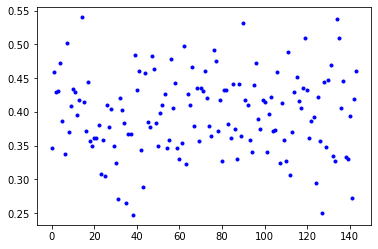

In [25]:
from matplotlib import pyplot as plt

upper_bound = 0.5
bottom_bound = 0.3
mean = (upper_bound + bottom_bound)/2
st_dev = (upper_bound - bottom_bound)/3.29
np.random.normal(mean, st_dev, size=(1, 44))

x=[i for i in range(144)]
# plt.title('Функции нормального распредления')

plt.plot(x,np.random.normal(mean, st_dev, size=(1, 144))[0], 'b.')

# plt.legend(('нормальное распрелеление'))
plt.show()

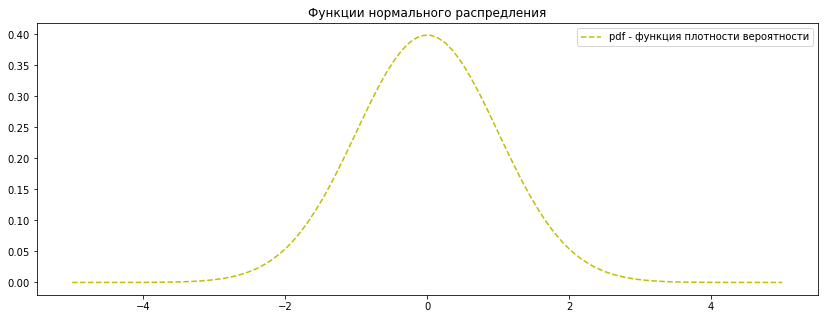

In [26]:
from IPython.core.pylabtools import figsize 
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

figsize(14, 5)


x = np.linspace(-5, 5, 100)


# y_norm = stats.norm.pdf(x)
# y_norm1 = stats.norm.cdf(x)
# y_norm2 = stats.norm.sf(x)
# y_norm3 = stats.norm.isf(x)
y_norm4 = normal_dist_density(x)


plt.title('Функции нормального распредления')

# plt.plot(x, y_norm, 'b+')
# plt.plot(x, y_norm1, 'r')
# plt.plot(x, y_norm2, 'g')
plt.plot(x, y_norm4, 'y--')

plt.legend(('pdf - функция плотности вероятности', 
            'Cumulative distribution function (cdf) - вероятность или площадь',
            'Survival function (sf = 1 - cdf)',
             "pdf - функция плотности, заданная аналитически"))
plt.show()

In [13]:
# main(H,E)